In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


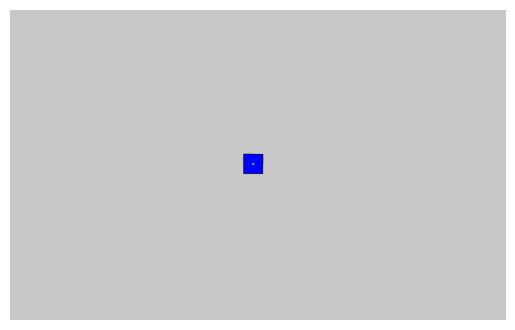

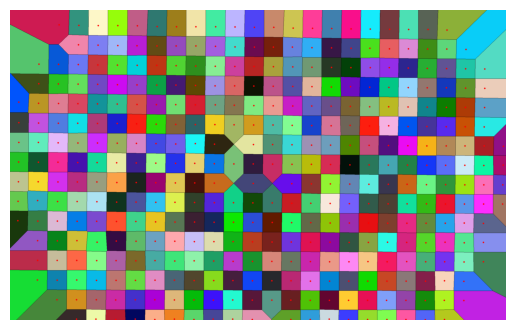

/workspaces/PTVcalib/src/grid_matching.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


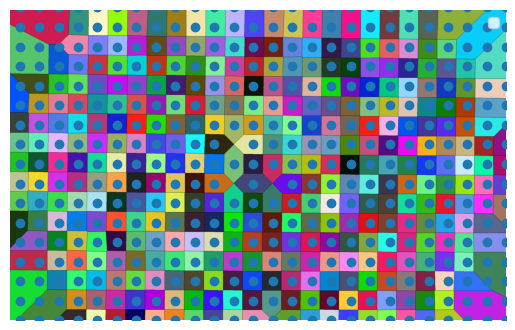

{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 171, 172, 173, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 

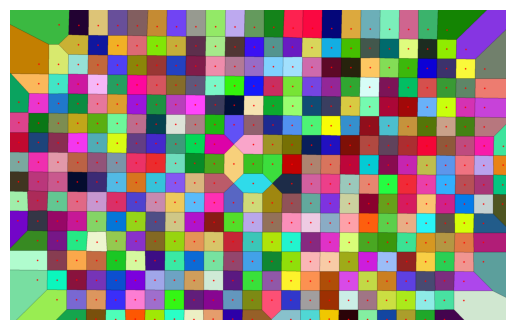

Matched 314 calibration points to facets.


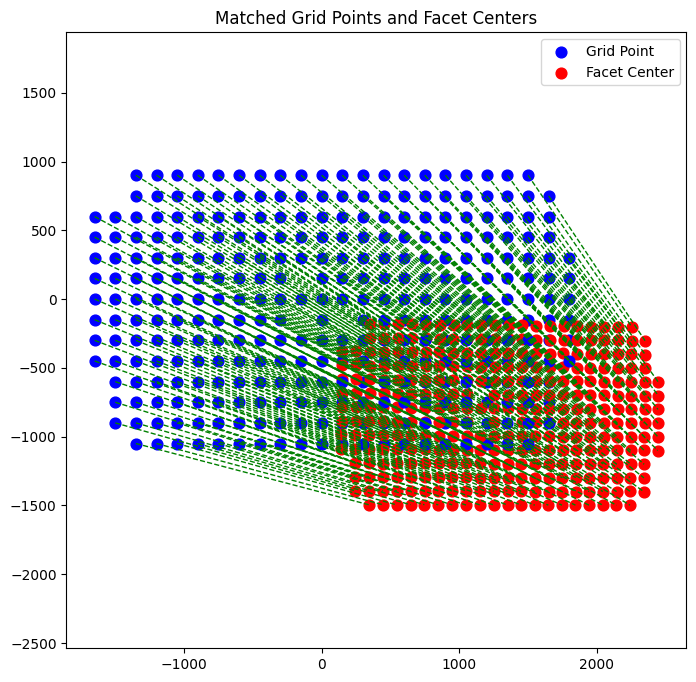

In [11]:
import cv2
import pandas as pd

from src.grid_matching import match_calibration_grid

filename = 'output/detected_points.txt'
image_points = pd.read_csv(filename).to_numpy()
calibration_points = pd.read_csv('calibration_targets/TSI_5mm_backlight_nX39_nY39.csv').to_numpy()

img = cv2.imread('sample_calibration_images/moving_target/set1/cal1.tif')

matches = match_calibration_grid(img, image_points=image_points, grid_points=calibration_points, grid_spacing=5)


In [12]:
import numpy as np

output_file = 'output/matches.txt'
with open(output_file, 'w') as f:
    for grid_pt, img_pt in matches:
        grid_str = ','.join(map(str, grid_pt))
        img_str = ','.join(map(str, img_pt))
        f.write(f"{grid_str},{img_str}\n")